<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_04_Prueba_de_Shapiro_Wilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Realizar prueba de normalidad de Shapiro Wilk sobre varios conjuntos de datos y evaluar si se acepta la hipótesis nula o se rechaza basados en el estadístico de *p.value*.


Con los mismos datos construídos en el caso 03 de la prueba de *Kolmogorov-Smirnov*, se hace esta prueba de *Shapiro Wilk* para determinar si los datos provienen de una distribución normal.






# Desarrollo



## Cargar librerías


In [ ]:
from scipy.stats import stats, chi2, expon, norm
from scipy import stats

import numpy as np

import matplotlib.pyplot as plt

## Sembrando semilla para aleatoriedad



In [ ]:
np.random.seed(2023)  # Para reproducibilidad  que se generen los mismos datos

In [ ]:
# 3 Los datos
# Generar una muestra de datos que sigue una distribución Chi-cuadrado con 5 grados de libertad
muestra_datos_chi2 = np.random.chisquare(5, 30)  # 1000 puntos de datos
print ("Datos chi cuadrada")
print (muestra_datos_chi2)

Datos chi cuadrada
[ 6.78423526  3.44654984  4.039487    1.76701445 17.78612901 10.10837688
  1.87395617  3.4435257   1.95447781  2.971622    1.40771078  5.28425945
  1.40863558  3.7588724   7.02549709  6.90340921  2.88974282  7.67566393
 13.90449908  7.52785952 10.93721811  2.71176448  6.33456571  2.35721682
  1.85509588  0.91420438  5.51912464  5.81648299  0.48778647  4.33091387]


# Visualizar la densidad de los datos de la muestra

¿qué tipo de gráfica es la densidad? ¿cómo se observa?

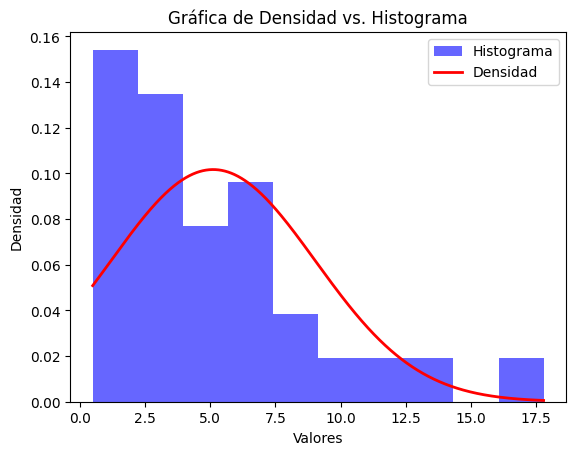

In [ ]:
# Crear un histograma
plt.hist(muestra_datos_chi2, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(muestra_datos_chi2), max(muestra_datos_chi2), 1000)
density = (1.0 / (muestra_datos_chi2.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - muestra_datos_chi2.mean())**2 / (2 * muestra_datos_chi2.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

# Mostrar la gráfica
plt.show()

La densidad de los datos y su histograma representados visualmente en la gráfica anterior se parecen a una distribución chi cuadrada y no una gráfica de campana "gauss".

¿Son estos datos de tipo normal?

Visualmente se observa que no pero se requiere un estadístico que justifique la respuesta.

Para ello se declaran las hipótesis y se evalúa al 95% de confianza a dos colas.

## Realizar la prueba de Shapiro Wilk

Se utiliza la función *stats.shapiro()* y utiziar los valores de que regresa la fnción paa evaluar la ormalidad de los datos.

Se devuelve el valor del estadístico de prueba y el estadístico p.value.

¿Qué significan estos estaídísticos?

El estadístico de prueba se contrasta contra los valores críticos de una densidad normal y se verifica si la hipótesis nula H0 está en zona de aceptación o en zona de rechazo.

El estadístico *p.value* se compara contra el valor de alfa y/o significancia y se evalúa si es menor a este para rechazar H0 o aceptar H0.

In [ ]:
# Realiza la prueba de Shapiro
# resultado = stats.shapiro(muestra_datos_chi2)
resultado = stats.shapiro(muestra_datos_chi2)

#           stats.shapiro(datos)

estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value

Estadístico de prueba: 0.8649563789367676
p_value:  0.001296318951062858


## Declarar hipótesis nula y alternativa

Declarar Hipótesis nula y alternativa
Se declara hipótesis nula y alternativa y la decisión de aceptar o rechazar comparando el estadístico contra el valor de alfa.

Estas hipótesis  es similar para cualquier prueba de Shapiro Wilk
Hipótesis:

$$
H_0: \text{Los datos se comportan de manera normal}
$$

$$
H_a: \text{Los datos no se comporta de manera normal}
$$

### Criterios de evaluacion

Evaluar el valor del estadístico *p.valor* contra el valor de alfa.

$$
Si (p.valor < alfa): \text{ Se rechaza Ho}
$$

$$
Si (p.valor >= alfa): \text{ Se acepta Ho}
$$


In [ ]:
# Estas hipótesis H0 y  Ha es similar para cualquier prueba de Kolmovorov-Smirnov
H0 = "Los datos SI provienen de una distribución normal"
Ha = "Los datos NO provienen de una distribución normal"
alfa = 0.05  # Nivel de significancia
significancia = alfa/2   # a dos colas

print ("Hipótesis nula: ", H0)
print ("Hipótesis alternativa: ", Ha)
print ("alfa: ", alfa)
print ("Significancia: ", significancia)

Hipótesis nula:  Los datos SI provienen de una distribución normal
Hipótesis alternativa:  Los datos NO provienen de una distribución normal
alfa:  0.05
Significancia:  0.025


## Contrastar el valor p.value contra alfa

In [ ]:
if (p_value < significancia):
  resultado = "Se rechaza H0. " + Ha
else:
  resultado = "Se acepta H0. " + H0
print(resultado)

Se rechaza H0. Los datos NO provienen de una distribución normal


## Muestra de tipo exponncial

Generar una meustra de tipo exponencial


In [ ]:
muestra_datos_exp = np.random.exponential(scale=1.0, size=100)  # 1000 puntos de datos

print ("Datos Exponencial")
print (muestra_datos_exp)

Datos Exponencial
[0.38859074 2.21112278 0.88685877 0.13535717 0.15238367 0.63091555
 0.02233729 1.29929026 0.7431515  0.78731554 0.60949241 0.69591554
 0.50164878 0.16389906 0.4476555  0.17682908 0.41242733 0.19884526
 0.49592289 0.03629912 0.83209125 0.2274798  0.38655178 0.47250882
 0.20340728 0.10976111 0.60683596 0.21798667 0.47566027 2.66688848
 1.42778205 1.47300428 0.90807596 1.56839745 1.66251334 3.94027978
 2.16095754 0.11631039 1.71319283 0.36761007 0.30312696 0.52041065
 0.80613758 0.98223408 0.08203496 3.58572472 0.52985734 1.27892771
 1.08852577 0.24618864 0.20723641 1.30851602 1.99006356 0.49712058
 0.11658788 2.43945352 0.44161987 0.53266603 0.20278923 0.8818658
 1.9356588  1.55913088 0.09194252 2.70296225 0.69304947 0.45296087
 0.66088561 0.72406957 5.22943847 1.40000165 0.45542232 0.94513547
 0.54405731 0.09615493 0.76540377 0.41667402 0.01851127 0.92495975
 2.54856457 0.33040049 1.80060436 0.79766951 0.02203195 0.42626987
 0.79858501 0.0132936  1.25840332 0.21044577 

## Visualizar la densidad de los datos de  la muestra

Ahora con los de tipo exponencial, ¿cómo se observa su densidad?, ¿es tipo gauss?


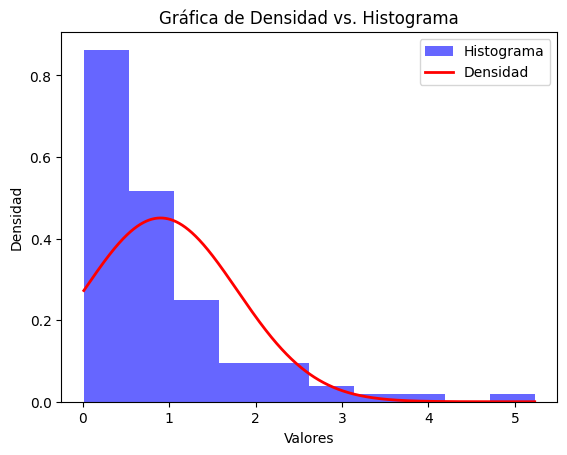

In [39]:
# Crear un histograma
plt.hist(muestra_datos_exp, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(muestra_datos_exp), max(muestra_datos_exp), 10000)
density = (1.0 / (muestra_datos_exp.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - muestra_datos_exp.mean())**2 / (2 * muestra_datos_exp.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

# Mostrar la gráfica
plt.show()

## Realizar la prueba de Shapiro Wilk

Se devuelve el valor del estadístico de prueba y el estadístico p.value.

¿Qué significan estos estaídísticos?

El estadístico de prueba se contrasta contra los valores críticos de una densidad normal y se verifica si la hipótesis nila H0 está en zona de aceptación o en zona de rechazo.

El estadístico *p.value* se compara contra el valor de alfa y se evalúa si es menor a este para rechazar H0 o aceptar H0.

In [41]:
# Realiza la prueba de Shapiro

resultado = stats.shapiro(muestra_datos_exp)

estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value

Estadístico de prueba: 0.7990716695785522
p_value:  2.3189311582072492e-10


## Contrastar el valor p.value contra alfa

In [42]:
if (p_value < significancia):
  resultado = "Se rechaza H0. " + Ha
else:
  resultado = "Se acepta H0. " + H0
print(resultado)

Se rechaza H0. Los datos NO provienen de una distribución normal


¿qué sucedería si los datos si provienen de una distribución normal?


## Simulando datos de tipo normal

Se crea una muestra de 100 estudiantes con calificaciones en donde la media es 85 y la desviación estándar es 5.



In [43]:
calificaciones = np.random.normal(loc=85, scale=4, size=40)
print("Calificaciones")
calificaciones

Calificaciones


array([85.21256512, 89.21521435, 82.36593895, 92.37779485, 84.69794232,
       86.05705096, 79.41856255, 87.83366273, 88.0510234 , 86.46918344,
       82.69268757, 83.33598019, 84.44983314, 90.17994989, 87.0823559 ,
       84.22290645, 83.45762909, 72.73686286, 82.32727779, 85.22785989,
       81.36252925, 79.04835801, 89.67844413, 86.57470974, 87.12227763,
       82.65428234, 89.2260001 , 82.06432702, 84.66412905, 85.50915264,
       86.3776902 , 87.74387978, 86.59963303, 88.57383197, 86.53917236,
       87.5644528 , 82.69074567, 81.72021011, 87.98727541, 92.34721863])

## Visualizar el histograma de calificaciones

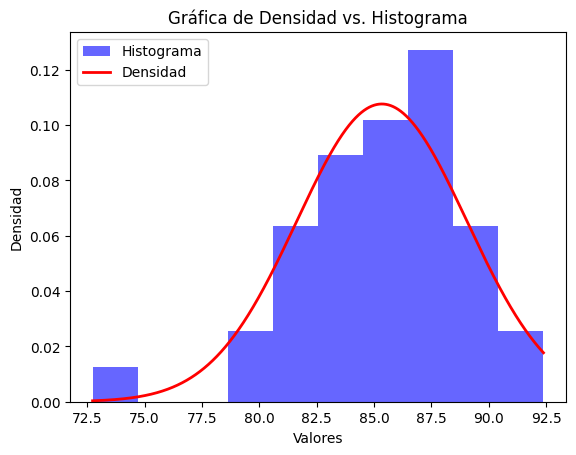

In [44]:
# Crear un histograma
plt.hist(calificaciones, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(calificaciones), max(calificaciones), 10000)
density = (1.0 / (calificaciones.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - calificaciones.mean())**2 / (2 * calificaciones.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

Se observa una simétrica densidad en una aceptabla gráfica de de campana o "gauss". Pero, ¿la muestra de calificaciones proviene de una distribución normal?

Hay que hacer la prueba ... Shapiro Wilks

## Realizar la prueba Shapiro Wilk con calificaciones

In [45]:
# Realiza la prueba de Shapiro

resultado = stats.shapiro(calificaciones)

estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value

Estadístico de prueba: 0.9551141262054443
p_value:  0.11378919333219528


## Contrastar el valor p.value contra alfa



In [46]:
if (p_value < significancia):
  resultado = "Se rechaza H0. " + Ha
else:
  resultado = "Se acepta H0. " + H0
print(resultado)

Se acepta H0. Los datos SI provienen de una distribución normal


# Interpretación

Se observó en este caso 04 que la prueba de Shpairo Wilk es mas contundente para identificar si los datos provienen de una disribución normal.

El valor de *p.value* está por debajo del valor alfa 0.05 por lo que se rechaza la hipo´tesis nula $H_0$.

Esta prueba de Shapiro Wilk es más contundente y enriquece la prueba de normalidad de Kolmogorov Smirnov.
